# Exploring and Comparing venues in Downtown and Back bay of Boston

## Downtown and Back bay of Boston 

Boston is the capital and most populous city of Massachusetts in the United States. Boston has a total area of 49 square miles.  The most popular places in Boston are Back Bay and Downtown.There are many venues (especially restaurants, hotels and cafes) which can be explored. Let's compare Back Bay and Downtown in Boston, to see what are their characteristics.

We can use the geopy library to extract the latitude and longitude values of Back Bay and Downtown.

In [2]:
#import map
!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim
address1 = 'Back Bay, Boston'

geolocator1 = Nominatim(user_agent="ny_explorer")
location1 = geolocator1.geocode(address1)
latitude1 = location1.latitude
longitude1 = location1.longitude
print('The geograpical coordinate of Back Bay are {}, {}.'.format(latitude1, longitude1))

Solving environment: ...working... 
  - anaconda/win-64::openssl-1.1.1d-he774522_2
  - defaults/win-64::openssl-1.1.1d-he774522_2done

# All requested packages already installed.

The geograpical coordinate of Back Bay are 42.3507067, -71.0797297.


In [7]:
address2 = 'Downtown crossing'

geolocator2 = Nominatim(user_agent="ny_explorer")
location2 = geolocator2.geocode(address2)
latitude2 = location2.latitude
longitude2 = location2.longitude
print('The geograpical coordinate of Downtown are {}, {}.'.format(latitude2, longitude2))

The geograpical coordinate of Downtown are 42.3554309, -71.0605001.


In [8]:
address = 'Boston'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Boston are {}, {}.'.format(latitude, longitude))


The geograpical coordinate of Boston are 42.3602534, -71.0582912.


The geographical coordinate of Boston derived from geopy is the same as I searched online.

Let's use the folium library to create a complete map zoomed on Boston. We'll also plot a marker on the coordinates of Boston we just identified above. This would give us a relatively good look at the Downtown and Back Bay point we will be considering.

In [14]:
import folium
boston_map = folium.Map(location=[latitude, longitude], zoom_start=14)
folium.Marker([latitude, longitude]).add_to(boston_map)

#boston_map.save("maps/boston Map.html")  
boston_map


# Boston Neighborhood data from Kaggle

Kaggle is a free website to find various data. Download 'crime_rates_by_neighborhood.csv' from Kaggel. Then clipping the datafram to get the information of neighborhood and coordination.

#### Get the information of neighborhood and coordination.

In [19]:
import pandas as pd
import numpy as np
df = pd.read_csv('crimes_with_neighborhoods.csv')

In [20]:
df1=df[['lat','long','Neighborhood','street']]

In [21]:
df1.head(10)

,lat,long,Neighborhood,street
0,42.295064,-71.056725,Dorchester,CENTRE ST
1,42.349780,-71.134230,Allston,GLENVILLE AVE
2,42.310136,-71.070293,Dorchester,MOUNT EVERETT ST
3,42.328632,-71.083099,Roxbury,DUDLEY ST
4,42.324355,-71.074403,Roxbury,DUDLEY ST
5,42.312521,-71.064350,Dorchester,HANCOCK ST
6,42.326966,-71.061986,Dorchester,ALLSTATE RD
7,42.372269,-71.039015,East Boston,HAVRE ST
8,42.283295,-71.088241,Dorchester,WILDWOOD ST
9,42.292221,-71.074671,Dorchester,WHITFIELD ST


In [23]:
df2= df1.dropna()

In [24]:
df2.shape

(168249, 4)

### Downtown Neighborhood 

In [25]:
import numpy
downtown_data=df2[df2['Neighborhood'].str.contains("Downtown")]
numpy_array1 = downtown_data.to_numpy()
downtown_data = pd.DataFrame(data=numpy_array1, columns=["Latitude", "Longitude","Neighborhood","Street"])
downtown_data.drop_duplicates(keep = False, inplace = True)
downtown_data=downtown_data.sample(n=36) 
numpy_array1 = downtown_data.to_numpy()
downtown_data = pd.DataFrame(data=numpy_array1, columns=["Latitude", "Longitude","Neighborhood","Street"])
downtown_data.head()

,Latitude,Longitude,Neighborhood,Street
0,42.3605,-71.0614,Downtown,SOMERSET ST
1,42.3509,-71.0631,Downtown,KNEELAND ST
2,42.3583,-71.0556,Downtown,EXCHANGE PL
3,42.3555,-71.0565,Downtown,FEDERAL ST
4,42.3581,-71.0523,Downtown,FRANKLIN ST


### Back Bay Neighborhoods 

In [27]:
backbay_data=df2[df2['Neighborhood'].str.contains("Back Bay")]
numpy_array2 = backbay_data.to_numpy()
backbay_data = pd.DataFrame(data=numpy_array2, columns=["Latitude", "Longitude","Neighborhood","Street"])
backbay_data.drop_duplicates(keep = False, inplace = True)
numpy_array2 = backbay_data.to_numpy()
backbay_data = pd.DataFrame(data=numpy_array2, columns=["Latitude", "Longitude","Neighborhood","Street"])
backbay_data["Latitude"] = backbay_data["Latitude"].astype("float")
backbay_data["Longitude"] = backbay_data["Longitude"].astype("float")
backbay_data.head()

,Latitude,Longitude,Neighborhood,Street
0,42.355407,-71.072616,Back Bay,ARLINGTON ST
1,42.349092,-71.075621,Back Bay,TRINITY PL
2,42.349094,-71.081898,Back Bay,FAIRFIELD ST
3,42.351700,-71.088493,Back Bay,BACK ST
4,42.345182,-71.081476,Back Bay,W NEWTON ST


### Visualize the Downtown neighborhood in Boston Map

In [28]:
# create map of Boston using latitude and longitude values
boston_map = folium.Map(location=[latitude, longitude], zoom_start=13)

# add markers to map
for lat, lng, label in zip(downtown_data['Latitude'], downtown_data['Longitude'], downtown_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(boston_map)  
    
boston_map

## Foursquare API 

Then we fetched a total of all venues in Downtown and Back Bay using the Foursquare API. The Foursquare API has the explore API which allows us to find venue recommendations within a given radius from the given coordinates. We will use this API to find all the venues we need.

In [32]:
FOURSQUARE_CLIENT_ID = 'PXXDDZIYPWL0EWVIUAJBFPQQ2UJHR3SYLO4ZHRVF23NUKNTM' # your Foursquare ID
FOURSQUARE_CLIENT_SECRET = 'DISZZPGLAF34JNZ02V0EJHYCNY44PD10CCTADRNFTGBRPTZL' # your Foursquare Secret
VERSION = '20200504' # Foursquare API version

In [35]:
from pandas.io.json import json_normalize
import requests
def getNearbyVenues(names, latitudes, longitudes, radius=500, LIMIT=100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            FOURSQUARE_CLIENT_ID, 
            FOURSQUARE_CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

## Venues in Downtown of Boston

In [36]:
downtown_venues = getNearbyVenues(names=downtown_data['Neighborhood'],
                                   latitudes=downtown_data['Latitude'],
                                   longitudes=downtown_data['Longitude'])

Downtown
Downtown
Downtown
Downtown
Downtown
Downtown
Downtown
Downtown
Downtown
Downtown
Downtown
Downtown
Downtown
Downtown
Downtown
Downtown
Downtown
Downtown
Downtown
Downtown
Downtown
Downtown
Downtown
Downtown
Downtown
Downtown
Downtown
Downtown
Downtown
Downtown
Downtown
Downtown
Downtown
Downtown
Downtown
Downtown


In [37]:
print(downtown_venues.shape)
downtown_venues.head()

(2654, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Downtown,42.360536,-71.061407,Health Yoga Life,42.361261,-71.063722,Yoga Studio
1,Downtown,42.360536,-71.061407,Florina,42.359375,-71.063219,Pizza Place
2,Downtown,42.360536,-71.061407,Grotto,42.359915,-71.062807,Italian Restaurant
3,Downtown,42.360536,-71.061407,Zo,42.359303,-71.060352,Greek Restaurant
4,Downtown,42.360536,-71.061407,Big Apple Circus,42.360208,-71.059269,Circus


## Venues in Back Bay of Boston

In [39]:
backbay_venues = getNearbyVenues(names=backbay_data['Neighborhood'],
                                   latitudes=backbay_data['Latitude'],
                                   longitudes=backbay_data['Longitude'])

Back Bay
Back Bay
Back Bay
Back Bay
Back Bay
Back Bay
Back Bay
Back Bay
Back Bay
Back Bay
Back Bay
Back Bay
Back Bay
Back Bay
Back Bay
Back Bay
Back Bay
Back Bay
Back Bay
Back Bay
Back Bay
Back Bay
Back Bay
Back Bay
Back Bay
Back Bay
Back Bay
Back Bay
Back Bay
Back Bay
Back Bay
Back Bay
Back Bay


In [40]:
print(backbay_venues.shape)
backbay_venues.head()

(2673, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Back Bay,42.355407,-71.072616,The Esplanade,42.356064,-71.074894,Park
1,Back Bay,42.355407,-71.072616,DCR Hatch Memorial Shell,42.356780,-71.073992,Music Venue
2,Back Bay,42.355407,-71.072616,Make Way For Ducklings,42.355569,-71.069764,Outdoor Sculpture
3,Back Bay,42.355407,-71.072616,Boston Public Garden,42.354096,-71.069865,Garden
4,Back Bay,42.355407,-71.072616,Cheers,42.355877,-71.071271,Bar


## Analysis 

#### We have various types of venues in the final Downtown and Back Bay dataset. We will take a look at the venues and check which are the majority venue categories in the list.

In [44]:
downtown_venues['Venue Category'].value_counts()

Chinese Restaurant    141
Coffee Shop           127
Bakery                125
Asian Restaurant      105
Sandwich Place         87
                     ... 
Cosmetics Shop          1
Juice Bar               1
Mac & Cheese Joint      1
Convenience Store       1
Women's Store           1
Name: Venue Category, Length: 140, dtype: int64

In [45]:
backbay_venues['Venue Category'].value_counts()

Clothing Store          180
Coffee Shop             120
Hotel                   104
American Restaurant      81
Seafood Restaurant       79
                       ... 
Pharmacy                  1
Wings Joint               1
Ethiopian Restaurant      1
Sports Bar                1
River                     1
Name: Venue Category, Length: 145, dtype: int64

#### Visulize the venue distribution in Downtown and Backbay

<BarContainer object of 144 artists>

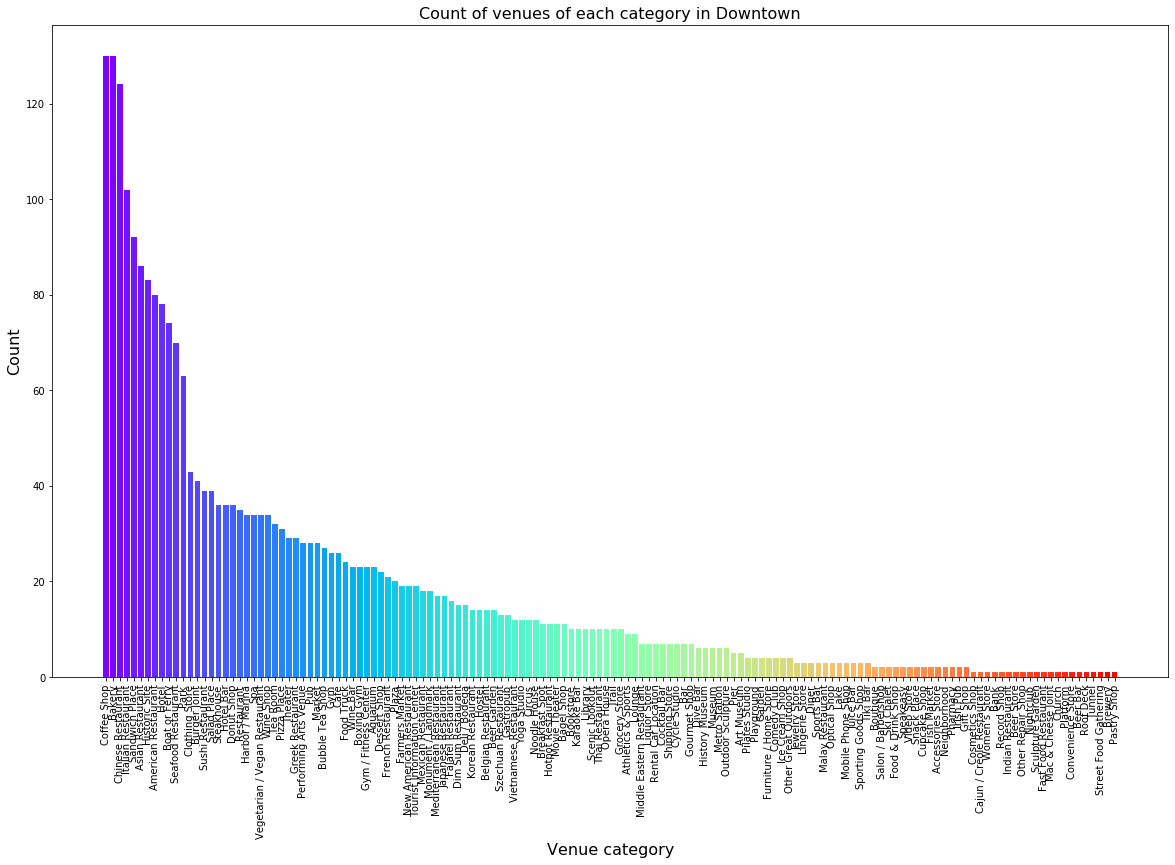

In [136]:
venue_distribution = downtown_venues['Venue Category'].value_counts()
colors = cm.rainbow(np.linspace(0, 1, len(venue_distribution.index)))
plt.figure(figsize = (20, 12))
plt.xticks(rotation = 90)
plt.xlabel("Venue category", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.title("Count of venues of each category in Downtown", fontsize = 16)
plt.bar(venue_distribution.index, venue_distribution.values, color = colors)

<BarContainer object of 145 artists>

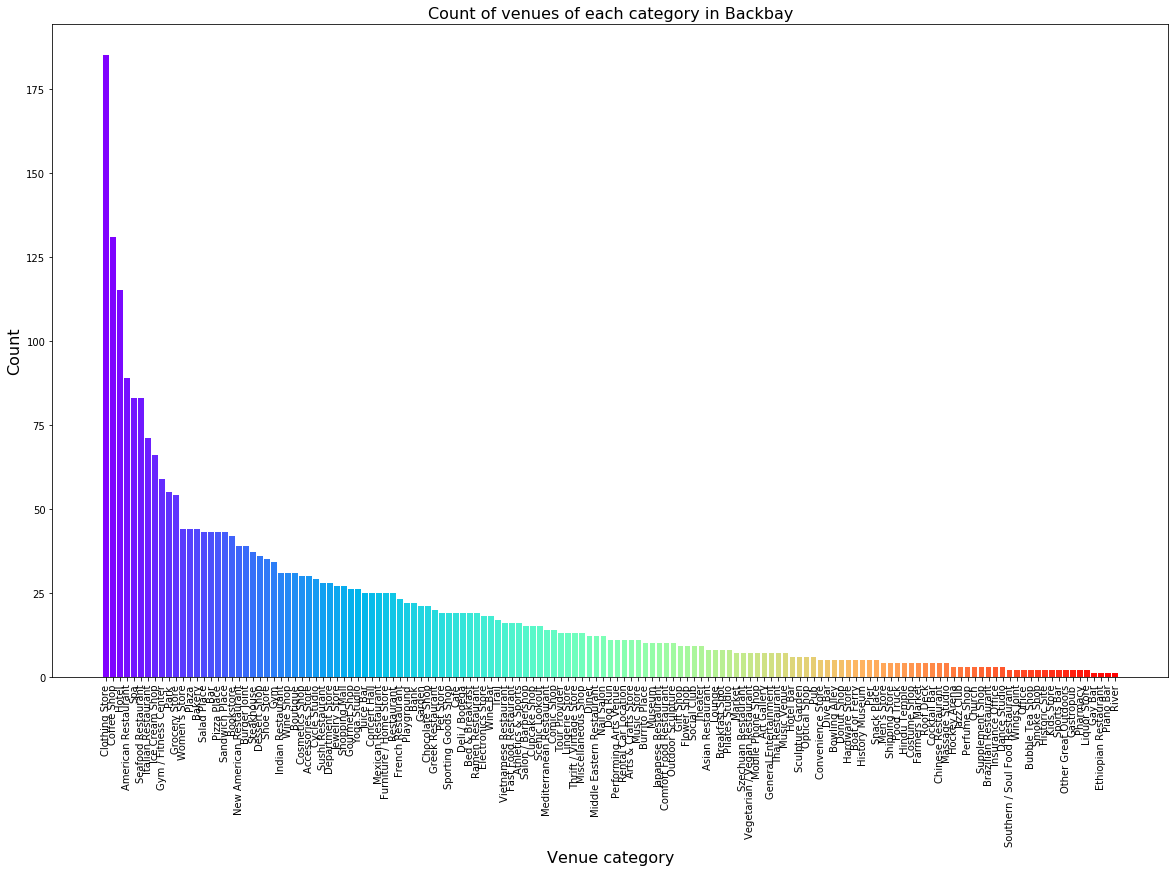

In [137]:
venue_distribution = backbay_venues['Venue Category'].value_counts()
colors = cm.rainbow(np.linspace(0, 1, len(venue_distribution.index)))
plt.figure(figsize = (20, 12))
plt.xticks(rotation = 90)
plt.xlabel("Venue category", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.title("Count of venues of each category in Backbay", fontsize = 16)
plt.bar(venue_distribution.index, venue_distribution.values, color = colors)

# Conclusion 

Based on our analysis above, we can draw a number of conclusions that will be useful to aid any visitor/resident/businessman.
After collecting data from the Foursquare and Kaggle, we got a list of 2673 venues in Downtown and Back Bay. 
As we can see the majority venues in Downtown are 'Coffee Shop' ,'Bakery', 'Chinese Restaurant' and 'Italian Restaurant'; in Back Bay are 'Clothing Store', 'Coffee Shop', 'Hotel'. The number of each venues are also shown above. 
If someone wants to buy clothes, then Back Bay is a good choice. If someone wants to eat Chinese food, then Downtown is a good choice. If a businessman wants to open a Italian Restaurant, it will be very competitive if he/she chooses the place at Back Bay. 
A company can use this information to build up an online website/mobile application, to provide users with up to date information about various venues in the city based on the search criteria .
